# Prática 3 - Modelando assuntos

In [1]:
from gensim import corpora, models, similarities
from nltk.tokenize import WordPunctTokenizer
from nltk.corpus import stopwords
from string import punctuation
from pprint import pprint

## Definindo um problema

A epidemia de Zika gerou uma epidemia de publicações científicas sobre o assunto. Como é uma doença pouco conhecida, pesquisas em diversas áreas do conhecimento precisam ser conduzidas para poder preencher a lacuna da nossa ignorância.

Neste exercício vamos analizar um corpus de resumos de artigos publicados sobre o assunto e tentar modelar os assuntos existentes.

In [2]:
dicionario = corpora.Dictionary.load('Dicionario_zika.dict')
corpus = corpora.MmCorpus('corpus_zika')

In [3]:
print(dicionario)
print(corpus)
498*5886

Dictionary(5886 unique tokens: ['measure', 'inhibits', 'antivirals', 'contribution', 'mid']...)
MmCorpus(498 documents, 5886 features, 24027 non-zero entries)


2931228

In [8]:
print(dicionario[35])
for doc in corpus[:3]:
    print(doc)

We
[(0, 2.0), (1, 1.0), (2, 1.0), (3, 1.0), (4, 1.0), (5, 3.0), (6, 1.0), (7, 2.0), (8, 3.0), (9, 1.0), (10, 1.0), (11, 1.0), (12, 2.0), (13, 1.0), (14, 1.0), (15, 1.0), (16, 2.0), (17, 1.0), (18, 2.0), (19, 1.0), (20, 1.0), (21, 1.0), (22, 1.0), (23, 1.0), (24, 1.0), (25, 2.0), (26, 1.0), (27, 1.0), (28, 1.0), (29, 1.0), (30, 2.0), (31, 1.0), (32, 2.0), (33, 1.0), (34, 1.0), (35, 2.0), (36, 1.0), (37, 3.0), (38, 3.0), (39, 1.0), (40, 3.0), (41, 1.0), (42, 1.0), (43, 2.0), (44, 1.0), (45, 2.0), (46, 3.0), (47, 3.0), (48, 5.0), (49, 1.0), (50, 1.0), (51, 2.0), (52, 2.0), (53, 1.0), (54, 1.0), (55, 1.0), (56, 1.0), (57, 1.0), (58, 1.0), (59, 1.0), (60, 1.0), (61, 1.0), (62, 2.0), (63, 1.0), (64, 1.0), (65, 1.0), (66, 1.0), (67, 3.0), (68, 3.0), (69, 1.0), (70, 2.0), (71, 1.0), (72, 1.0), (73, 1.0), (74, 1.0), (75, 1.0), (76, 2.0), (77, 1.0), (78, 5.0), (79, 1.0), (80, 1.0), (81, 1.0), (82, 1.0), (83, 12.0), (84, 1.0), (85, 1.0), (86, 1.0), (87, 1.0), (88, 1.0), (89, 2.0), (90, 2.0), (91,

## Latent Semantic Indexing - LSI

In [9]:
tfidf = models.TfidfModel(corpus)
corpus_tfidf = tfidf[corpus]

In [32]:
import pandas as pd
import seaborn as sns
from collections import OrderedDict
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [56]:
lsi = models.LsiModel(corpus_tfidf, id2word=dicionario, num_topics=10)
corpus_lsi = lsi[corpus_tfidf]

In [46]:
data = {i: OrderedDict(lsi.show_topic(i,10)) for i in range(10)}

In [47]:
print(lsi.show_topic(0,4))
OrderedDict(lsi.show_topic(0,4))

[('ZIKV', 0.34157754946597269), ('virus', 0.2589532962466361), ('Zika', 0.19200528472419356), ('infection', 0.15149989728673044)]


OrderedDict([('ZIKV', 0.34157754946597269),
             ('virus', 0.2589532962466361),
             ('Zika', 0.19200528472419356),
             ('infection', 0.15149989728673044)])

In [48]:
df = pd.DataFrame(data)
print(df.shape)
df = df.fillna(0).T

(57, 10)


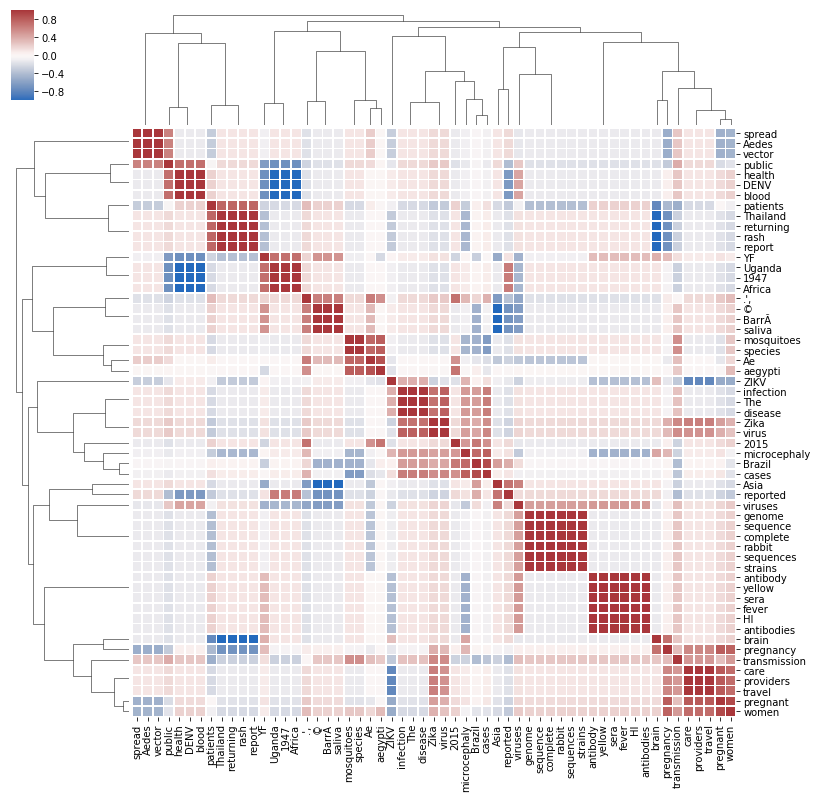

In [49]:
sns.clustermap(df.corr(), center=0, cmap="vlag", metric='cosine',
               linewidths=.75, figsize=(13, 13))

Depois de estimar o modelo, podemos olhar os 30 assuntos, listando apenas as 4 palavras mais importantes.

In [51]:
lsi.show_topics(10,4)

[(0, '0.342*"ZIKV" + 0.259*"virus" + 0.192*"Zika" + 0.151*"infection"'),
 (1, '-0.517*"ZIKV" + 0.241*"women" + 0.189*"virus" + 0.177*"pregnant"'),
 (2, '0.337*"ZIKV" + -0.251*"YF" + -0.200*"antibodies" + -0.195*"antibody"'),
 (3, '0.273*"ZIKV" + 0.170*"women" + -0.136*"spread" + 0.117*"pregnancy"'),
 (4,
  '0.370*"Ae" + 0.177*"transmission" + -0.152*"microcephaly" + 0.143*"aegypti"'),
 (5, '-0.295*"YF" + 0.207*"patients" + -0.163*"ZIKV" + -0.149*"microcephaly"'),
 (6, '-0.256*"Ae" + 0.186*"ZIKV" + -0.178*"Brazil" + -0.170*"microcephaly"'),
 (7, '0.404*"YF" + -0.127*"viruses" + -0.113*"public" + -0.104*"blood"'),
 (8, '0.167*"Ae" + -0.155*"sequence" + -0.152*"sequences" + -0.134*"viruses"'),
 (9, '-0.389*"YF" + -0.158*"Ae" + -0.120*"saliva" + 0.111*"viruses"')]

Podemos também olhar para os documentos do nosso corpus como uma combinação linear dos assuntos

In [52]:
for doc  in corpus_lsi:
    print(doc)
    break

[(0, 0.29345949180273639), (1, -0.045238539294030947), (2, 0.058141321080812304), (3, 0.34186611888639995), (4, 0.019284183630562609), (5, -0.089507821137489715), (6, -0.027912845143063768), (7, -0.064806149126194063), (8, 0.066229768508563797), (9, -0.007429908932425581)]


In [58]:
data = {'doc%s'%i: dict(doc) for i,doc in enumerate(corpus_lsi)}
df = pd.DataFrame(data).T
df

,0,1,2,3,4,5,6,7,8,9
doc0,0.293448,0.045910,0.059802,-0.338071,0.009629,0.095246,-0.014705,-0.061096,0.046427,-0.020413
doc1,0.280462,0.073513,0.016407,0.098279,0.025538,-0.027857,0.107954,-0.003770,-0.090543,0.071521
doc10,0.312368,0.025378,0.110931,-0.124504,0.056580,-0.055497,0.200755,0.032203,0.040944,-0.015639
doc100,0.284602,-0.345652,-0.032421,-0.170958,0.127540,-0.015213,0.068243,-0.039374,0.050760,0.048650
doc101,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc102,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc103,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
doc105,0.187376,-0.043939,-0.061345,-0.074192,-0.010422,-0.107114,-0.037837,-0.036795,0.017894,-0.068053
doc106,0.118089,-0.095774,0.029626,0.094175,-0.101016,0.052317,-0.045975,-0.074062,0.038308,-0.068729


Podemos calcular a similaridade por assunto de um documento com todos os demais documentos do corpus.

In [9]:
index = similarities.MatrixSimilarity(corpus_lsi)

Vamos escolher o primeiro documento do corpus para ser a referência

In [59]:
sims = index[doc]
#pprint(list(enumerate(sims)))
pprint(sorted(list(enumerate(sims)), key=lambda x:x[1], reverse=True))

[(0, 0.99999982),
 (430, 0.72549403),
 (401, 0.60872328),
 (6, 0.59549123),
 (12, 0.58171809),
 (27, 0.57662165),
 (494, 0.55630046),
 (11, 0.52500963),
 (118, 0.51750726),
 (2, 0.51049447),
 (10, 0.50143945),
 (181, 0.49604842),
 (69, 0.4917191),
 (477, 0.48722857),
 (14, 0.48322293),
 (136, 0.48118821),
 (400, 0.4778831),
 (464, 0.47529486),
 (476, 0.47422501),
 (19, 0.46904218),
 (28, 0.46404377),
 (32, 0.46105316),
 (146, 0.45609295),
 (7, 0.45096427),
 (16, 0.44940519),
 (42, 0.44707882),
 (327, 0.4418284),
 (331, 0.43761984),
 (381, 0.43488216),
 (391, 0.43355265),
 (438, 0.43186057),
 (39, 0.42472613),
 (402, 0.41902143),
 (443, 0.41847616),
 (428, 0.41725233),
 (4, 0.40815341),
 (423, 0.39857677),
 (31, 0.39586726),
 (174, 0.3942855),
 (343, 0.38758308),
 (15, 0.38606316),
 (44, 0.38249546),
 (127, 0.38134465),
 (436, 0.3808943),
 (24, 0.37842748),
 (46, 0.37477848),
 (390, 0.36867413),
 (287, 0.36813515),
 (79, 0.36283866),
 (173, 0.36114985),
 (386, 0.35697776),
 (29, 0.35541

## Latent Dirichlet Allocation - LDA

O LDA é uma técnica um pouco mais sofisticada que o LSI, que envolve uma interpretação probabilística do que é uma assunto. Para saber mais, veja este artigo: http://www.jmlr.org/papers/volume3/blei03a/blei03a.pdf

In [13]:
lda_model = models.ldamodel.LdaModel(corpus, id2word=dicionario, num_topics=30, passes=10)

In [14]:
lda_model.show_topics(30)

[(0,
  '0.012*The + 0.008*population + 0.008*new + 0.007*diseases + 0.007*development + 0.006*viral + 0.006*Chinese + 0.005*public + 0.005*inactivation + 0.005*Chikungunya'),
 (1,
  '0.021*Aedes + 0.016*mosquito + 0.016*human + 0.009*vector + 0.008*viruses + 0.008*U + 0.008*aegypti + 0.008*S + 0.007*2007 + 0.007*south'),
 (2,
  "0.000*virus + 0.000*%, + 0.000*ZIKV + 0.000*vector + 0.000*1 + 0.000*arboviruses + 0.000*Zika + 0.000*Polynesia + 0.000*.', + 0.000*DENV"),
 (3,
  "0.024*virus + 0.013*fever + 0.013*Zika + 0.008*.'] + 0.007*[' + 0.007*antibodies + 0.007*The + 0.007*sera + 0.007*ZIKV + 0.007*areas"),
 (4,
  "0.029*virus + 0.013*Zika + 0.010*blood + 0.010*infected + 0.010*MAb + 0.009*ZIKV + 0.007*cells + 0.007*fluorescent + 0.007*[' + 0.007*.']"),
 (5,
  '0.057*virus + 0.053*Zika + 0.018*infection + 0.017*transmission + 0.011*women + 0.010*disease + 0.009*pregnant + 0.009*microcephaly + 0.008*cases + 0.008*pregnancy'),
 (6,
  "0.012*Zika + 0.011*The + 0.011*virus + 0.010*), + 0.0

In [16]:
lsi.save?